# PRÉDICTION DE L'ATTRITION DES EMPLOYÉS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score


from pipeline import *

In [2]:
# Charger les donnees

print("CHARGEMENT DES DONNÉES")
print("="*60)

df = pd.read_csv("../db/data.csv")
df.head()

CHARGEMENT DES DONNÉES


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("LES INFORMATIONS SUR LES DONNEES")
print("="*60)

print(f"✓ Valeurs manquantes : {df.isnull().sum().sum()}")
print(f"✓ Lignes dupliquées : {df.duplicated().sum()}")
print(f"✓ Shape : {df.shape}")
print("-"*60)
print("✓ Description Statiques :")
df.describe()
# df.info()

LES INFORMATIONS SUR LES DONNEES
✓ Valeurs manquantes : 0
✓ Lignes dupliquées : 0
✓ Shape : (1470, 35)
------------------------------------------------------------
✓ Description Statiques :


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 2. Analyse de la variable cible

In [4]:
print("ANALYSE DE L'ATTRITION")
print("="*60)

attrition_counts = df['Attrition'].value_counts()
taux_attrition = (attrition_counts['Yes'] / len(df)) * 100

print(f"Non (0) : {attrition_counts['No']} employés")
print(f"Oui (1) : {attrition_counts['Yes']} employés")
print(f"Taux d'attrition : {taux_attrition:.2f}%")

ANALYSE DE L'ATTRITION
Non (0) : 1233 employés
Oui (1) : 237 employés
Taux d'attrition : 16.12%


## 3. Nettoyage des donnees

In [5]:
print("PARTIE 2 : NETTOYAGE DES DONNEES")
print("="*60)

# Supprimer colonnes inutiles
df_clean = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
print(f"✓ Colonnes supprimées : 4")
print(f"✓ Nouvelles dimensions : {df_clean.shape}")



PARTIE 2 : NETTOYAGE DES DONNEES
✓ Colonnes supprimées : 4
✓ Nouvelles dimensions : (1470, 31)


In [6]:
# Definir types de variables

categ_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime','Education',
            'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

num_cols = ['Age', 'DailyRate','DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
            'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


print(f"✓ Variables catégorielles : {len(categ_cols)}")
print(f"✓ Variables numériques : {len(num_cols)}")

✓ Variables catégorielles : 14
✓ Variables numériques : 16


## PARTIE 3 : Visualisations

PARTIE 3 : VISUALISATIONS
Generation des countplots pour variables categorielles


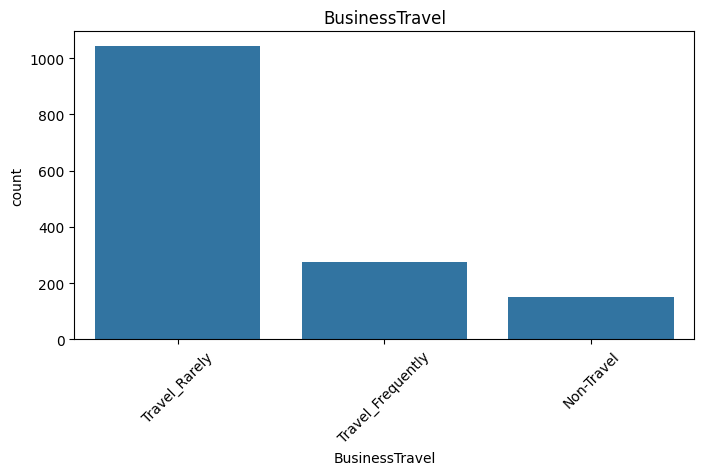

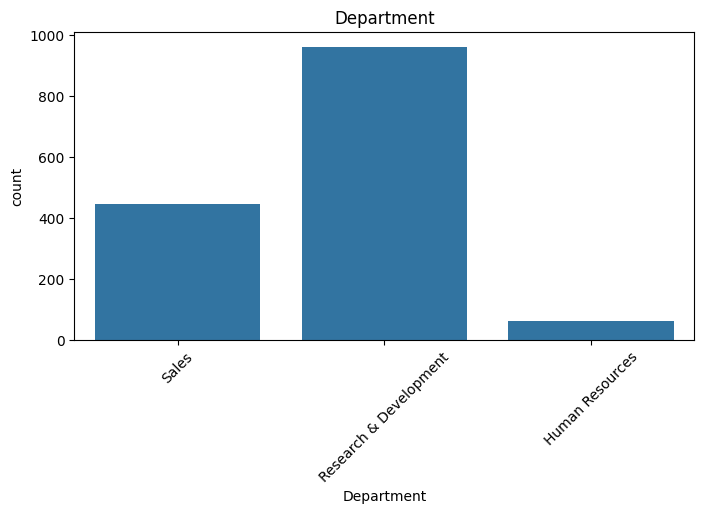

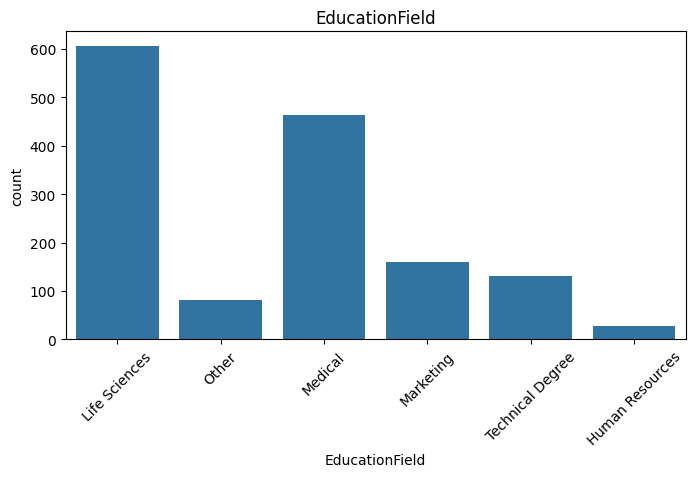

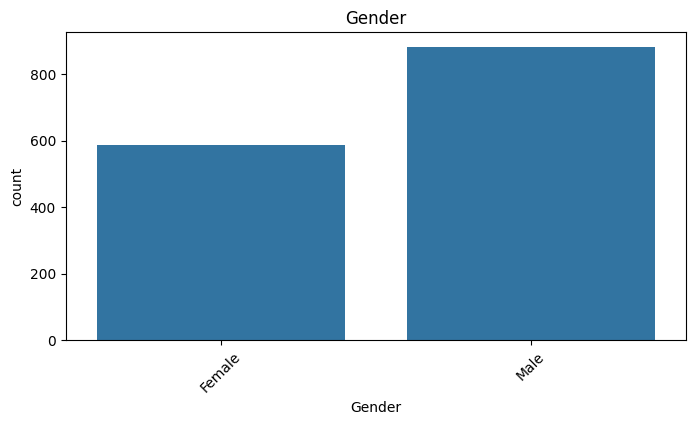

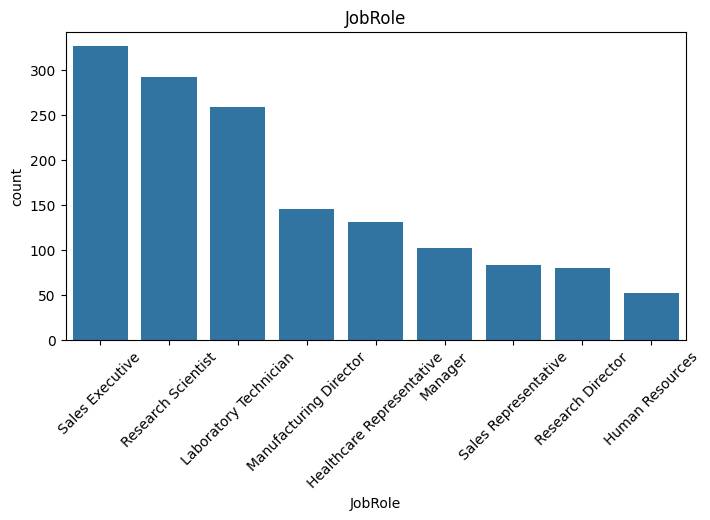

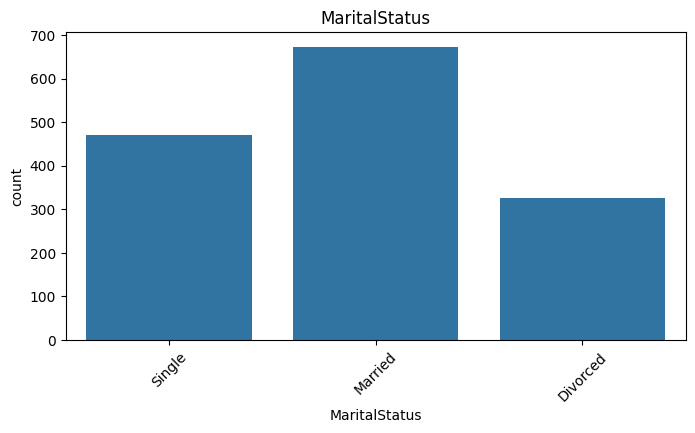

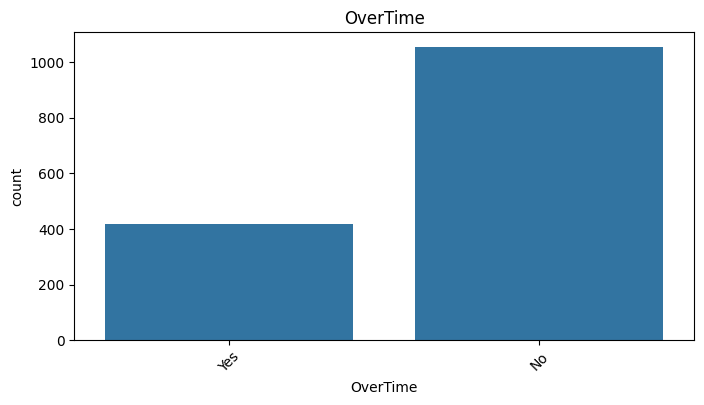

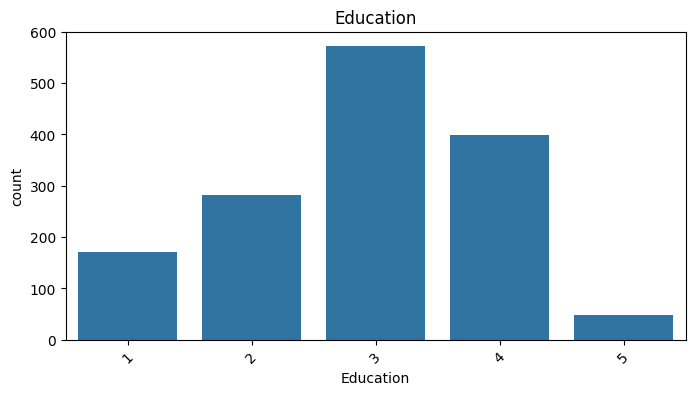

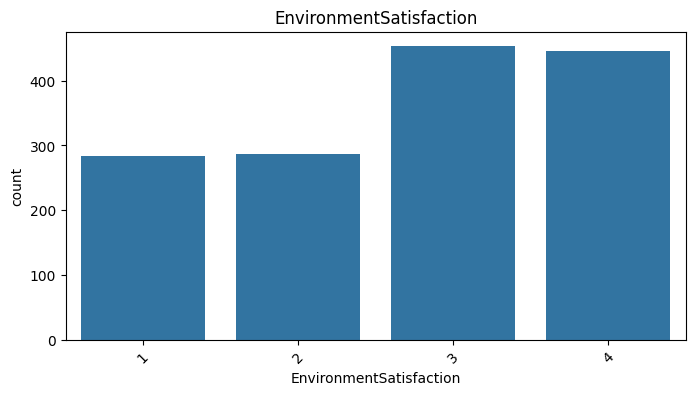

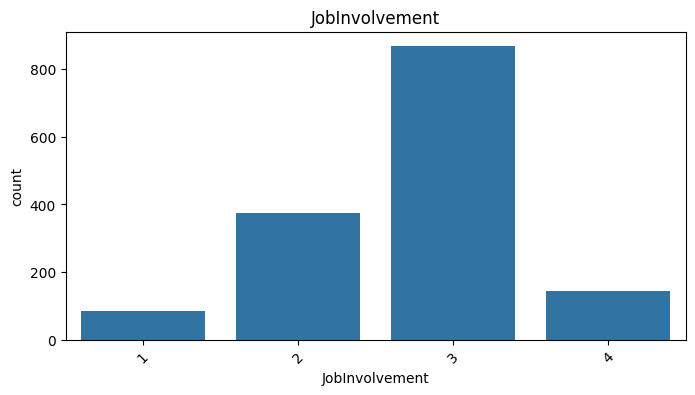

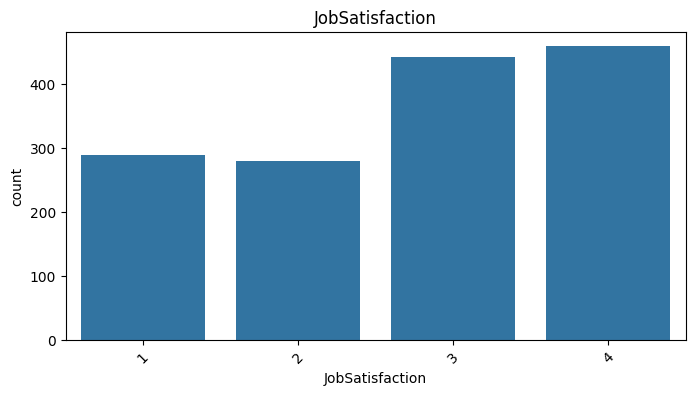

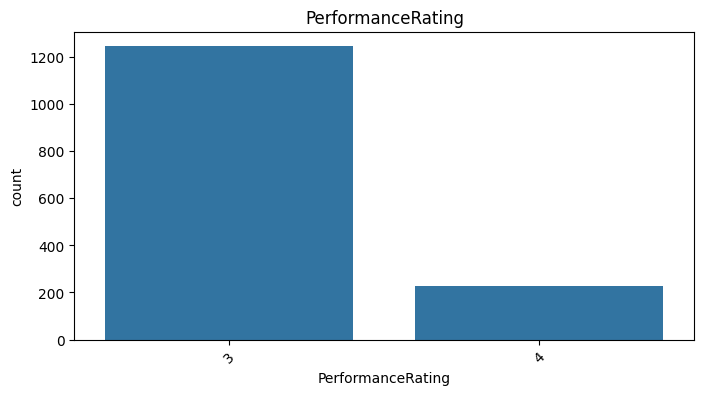

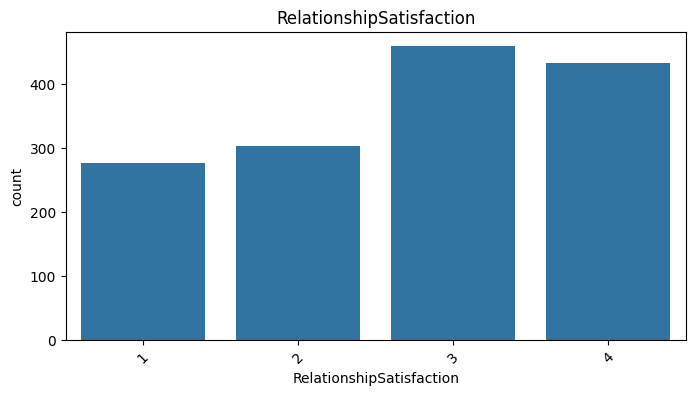

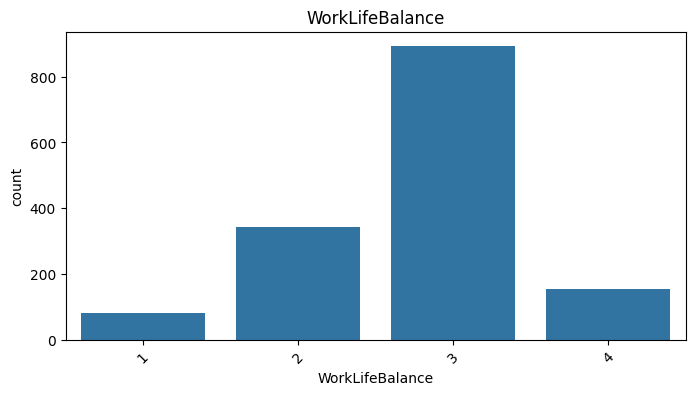

In [7]:

print("PARTIE 3 : VISUALISATIONS")
print("="*60)

print("Generation des countplots pour variables categorielles")
for col in categ_cols: 
    count_plot(df_clean, col)


Generation des boxplots pour variables numeriques


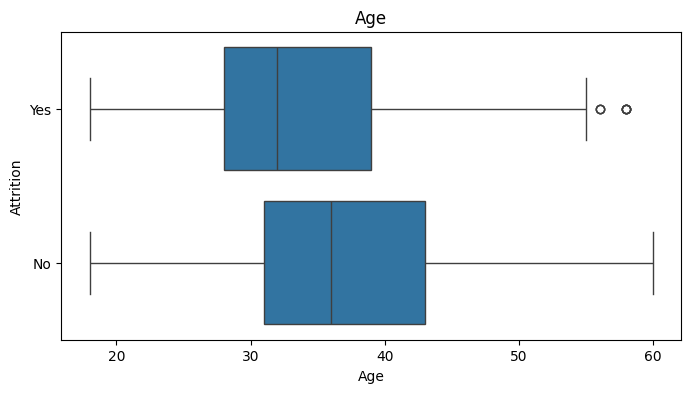

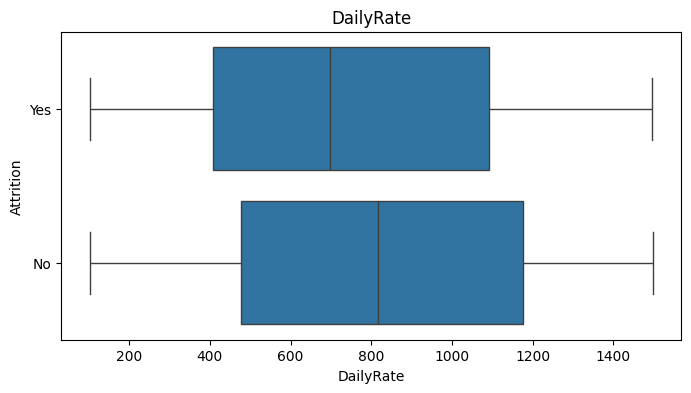

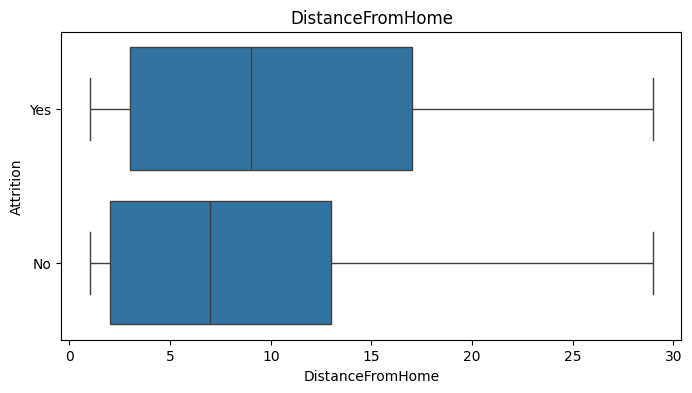

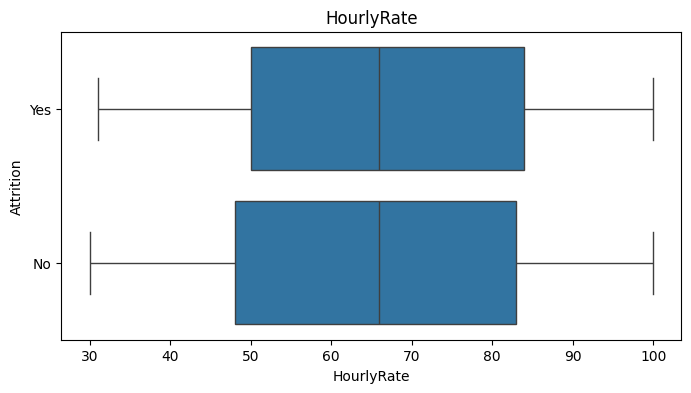

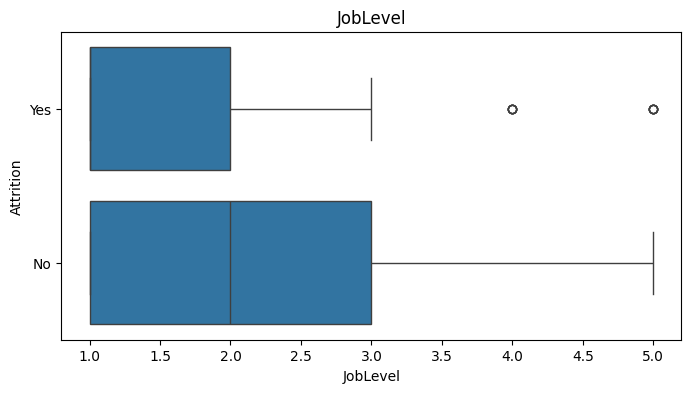

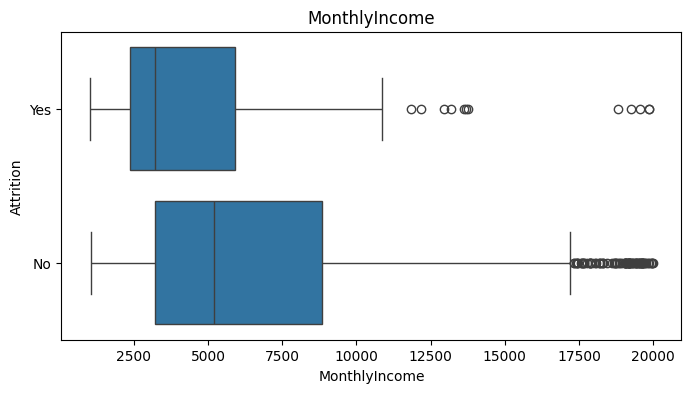

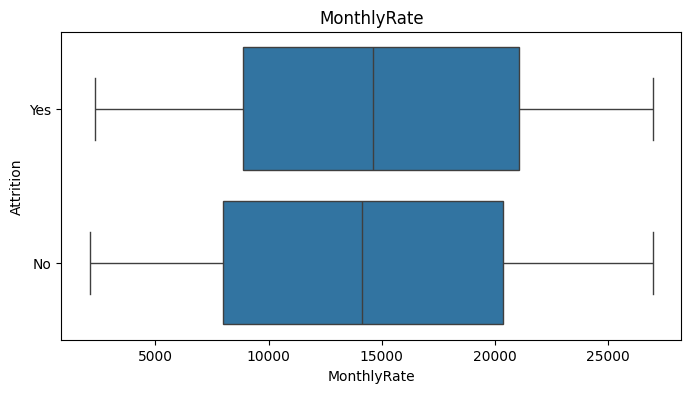

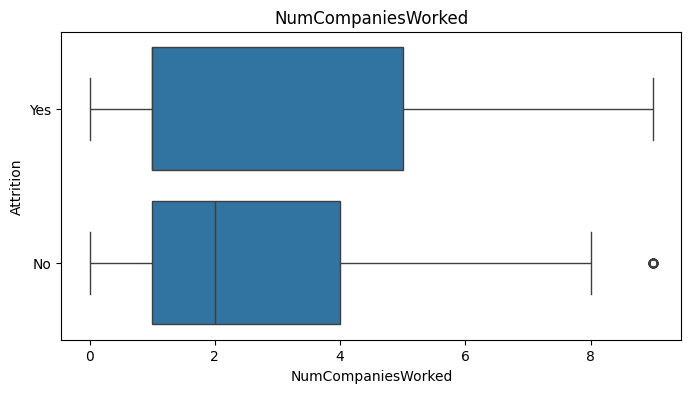

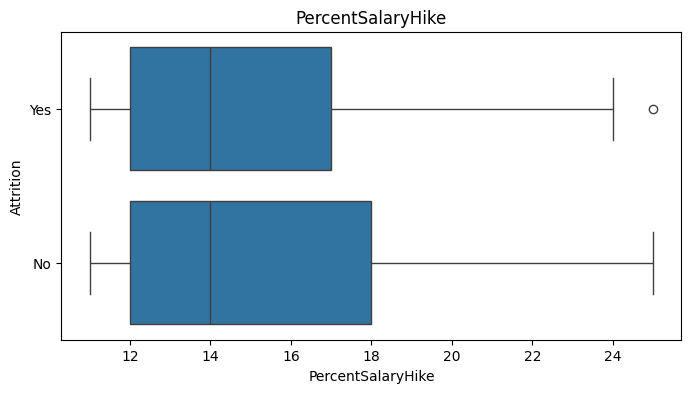

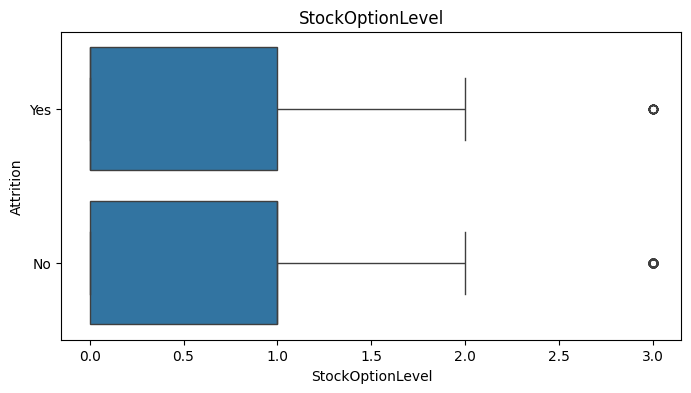

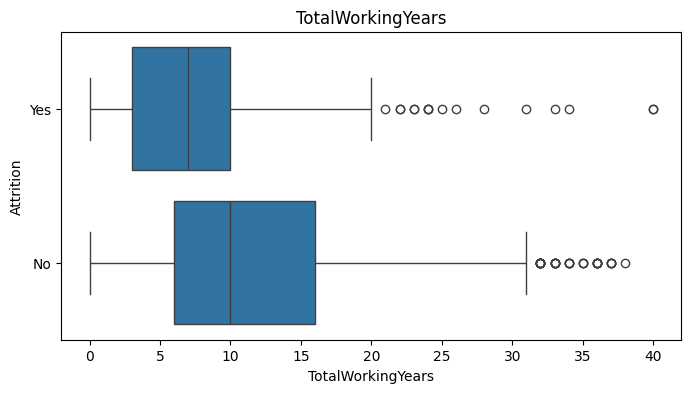

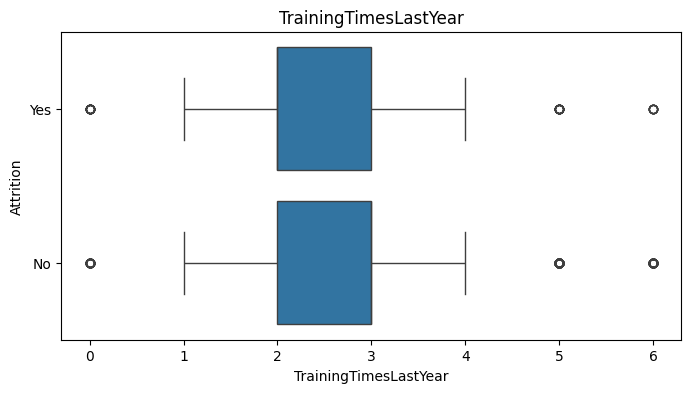

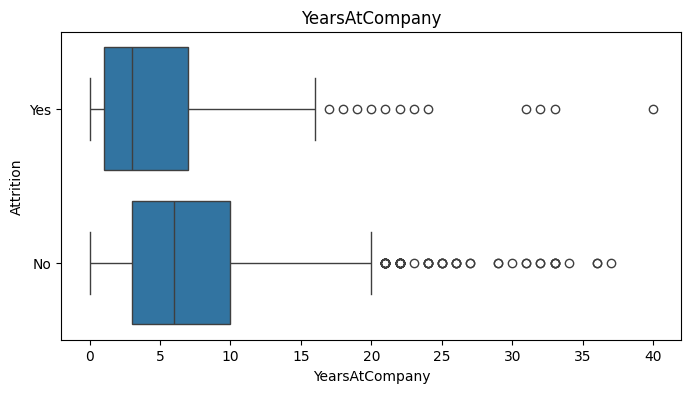

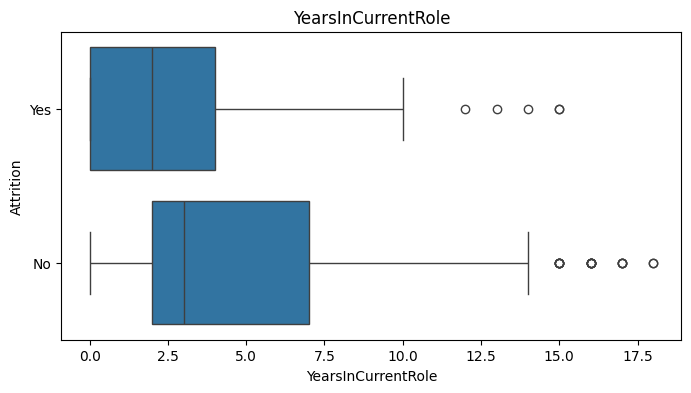

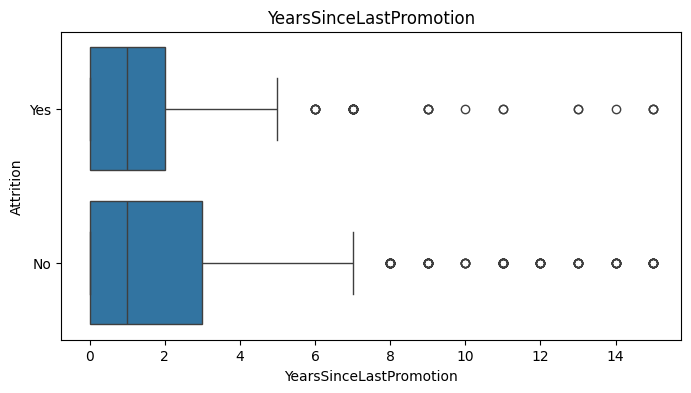

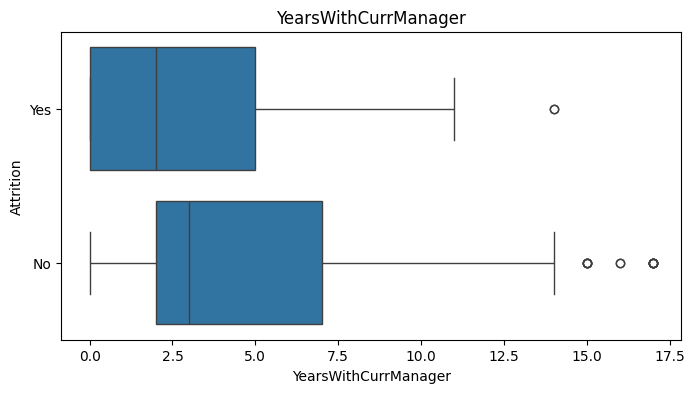

In [8]:
print("\nGeneration des boxplots pour variables numeriques")

df_num = df_clean.drop(categ_cols,axis=1)
df_cat = df_clean.drop(num_cols, axis=1)

# Visualisation par boxplots
for col in num_cols: 
    box_plot(df_clean, col)
    



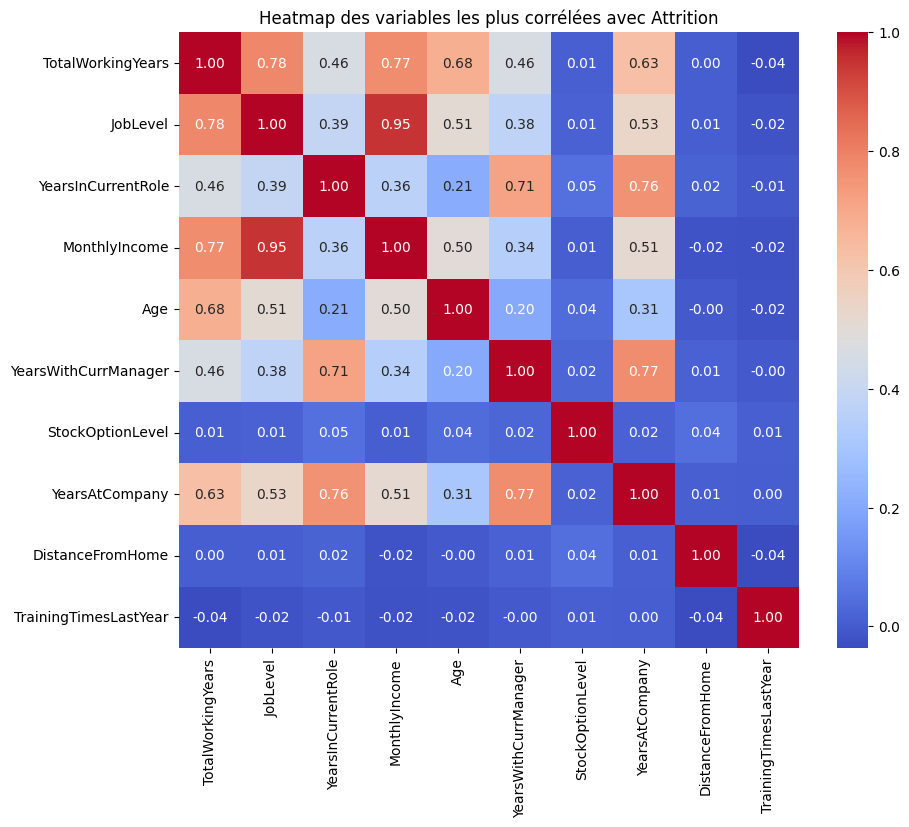

In [9]:
df_corr = df_num.copy()
df_corr['Attrition_encoded'] = (df_corr['Attrition'].map({'Yes': 1, 'No': 0}))

corr = df_corr[num_cols].corrwith(df_corr['Attrition_encoded'])
top_features = corr.abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10,8))
sns.heatmap(
    df_corr[top_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Heatmap des variables les plus corrélées avec Attrition")
plt.show()


# 5. Encodage et Selection des features

In [10]:
print("PARTIE 4 : PREPARATION DES DONNEES - MACHINE LEARNING")
print("="*60)

# Encoder toutes les colonnes catégorielles
df_encoded = encoder_colonnes(df_clean[categ_cols])
df_encoded.head()


PARTIE 4 : PREPARATION DES DONNEES - MACHINE LEARNING


,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2,2,3,4,3,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,1,3,2,2,4,4,3,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,2,4,2,3,3,2,3,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,4,4,3,3,3,3,3,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,1,1,3,2,3,4,3,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [11]:
# Préparation des variables explicatives et de la variable cible
X_complete = pd.concat([df_clean[num_cols], df_encoded], axis=1)
y = df_clean['Attrition'].map({'Yes': 1, 'No': 0})

In [12]:
# Selectionner les 20 meilleures features
# df_clean_encoded = pd.concat([df[num_cols], df_encoded], axis=1)
print("SELECTION DES MEILLEURES FEATURES (SelectKBest)")
best_features = select_kbest_columns(X_complete, y)
print("Meilleures features :", best_features)


SELECTION DES MEILLEURES FEATURES (SelectKBest)
Meilleures features : ['Age', 'JobLevel', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'JobRole_Research Director', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']


## 6. Division train/test

In [13]:
from sklearn.model_selection import train_test_split

print("DIVISION DES DONNEES")
print("="*60)

# Sélectionner uniquement les meilleures features
X = X_complete[best_features]
y = df_clean['Attrition'].map({'Yes': 1, 'No': 0})

# Separation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Vérification
print("✓ X_train shape:", X_train.shape)
print("✓ X_test shape:", X_test.shape)



DIVISION DES DONNEES
✓ X_train shape: (1176, 20)
✓ X_test shape: (294, 20)


# 7. Creation du pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

print("PARTIE 5 : PIPELINE DE PREPROCESSING")
print("="*60)

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', RobustScaler(), best_features),
    ]
)

PARTIE 5 : PIPELINE DE PREPROCESSING


# 8.  Entrainement des modeles

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

print("PARTIE 6 : ENTRAINEMENT DES MODELES")
print("="*60)

# Random Forest avec GridSearch
print("RANDOM FOREST")
print("-" * 60)

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced',random_state=42))
])

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10]
}

grid_rf = GridSearchCV(
    pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

grid_rf.fit(X_train, y_train)

print(f"Meilleur score AUC (CV) : {grid_rf.best_score_:.4f}")


PARTIE 6 : ENTRAINEMENT DES MODELES
RANDOM FOREST
------------------------------------------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits


Meilleur score AUC (CV) : 0.8079


In [16]:
# Logistic Regression avec GridSearch 
print("LOGISTIC REGRESSION")
print("-" * 60)

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42))
])

param_grid_lr = {
    'classifier__C': [0.1, 1, 10]
}

grid_lr = GridSearchCV(
    pipeline_lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

grid_lr.fit(X_train, y_train)

print(f"Meilleur score AUC (CV) : {grid_lr.best_score_:.4f}")


LOGISTIC REGRESSION
------------------------------------------------------------
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleur score AUC (CV) : 0.8134


In [17]:
#SVM (SVC)
from sklearn.svm import SVC

print("SVM (Support Vector Machine)...")
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(class_weight='balanced', probability=True, random_state=42))
])

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'linear']
}

grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train, y_train)
print(f"✓ Meilleur AUC (CV) : {grid_svm.best_score_:.4f}")

SVM (Support Vector Machine)...
✓ Meilleur AUC (CV) : 0.8109


# 9. Evaluation sur le test

In [18]:
print("PARTIE 7 : ÉVALUATION SUR LE TEST")
print("="*60)

results = {}

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] 
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }

# Évaluer les modèles
evaluate_model(grid_rf.best_estimator_, X_test, y_test, "Random Forest")
evaluate_model(grid_lr.best_estimator_, X_test, y_test, "Logistic Regression")
evaluate_model(grid_svm.best_estimator_, X_test, y_test, "SVM")

# Afficher les résultats
df_results = pd.DataFrame(results).T
print("\n" + df_results.to_string())


PARTIE 7 : ÉVALUATION SUR LE TEST

                     Accuracy  F1-score    Recall       AUC
Random Forest        0.785714  0.322581  0.384615  0.716642
Logistic Regression  0.734694  0.380952  0.615385  0.737657
SVM                  0.731293  0.377953  0.615385  0.723077


## 10. SMOTE pour Equilibrer les classes

In [19]:
from imblearn.over_sampling import SMOTE

print("APPLICATION DE SMOTE")
print("="*60)

# from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


APPLICATION DE SMOTE


## 11. Entrainement avec SMOTE

In [20]:
print("ENTRAINEMENT AVEC SMOTE")
print("="*60)

print("Random Forest + SMOTE...")
grid_rf_smote = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf_smote.fit(X_train_smote, y_train_smote)

print("Logistic Regression + SMOTE...")
grid_lr_smote = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr_smote.fit(X_train_smote, y_train_smote)

print("SVM + SMOTE...")
grid_svm_smote = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm_smote.fit(X_train_smote, y_train_smote)

evaluate_model(grid_rf_smote.best_estimator_, X_test, y_test, "Random Forest + SMOTE")
evaluate_model(grid_lr_smote.best_estimator_, X_test, y_test, "Logistic Regression + SMOTE")
evaluate_model(grid_svm_smote.best_estimator_, X_test, y_test, "SVM + SMOTE")

df_results_final = pd.DataFrame(results).T
print("\nTABLEAU COMPARATIF FINAL :\n")
print(df_results_final.to_string())

ENTRAINEMENT AVEC SMOTE
Random Forest + SMOTE...
Logistic Regression + SMOTE...
SVM + SMOTE...

TABLEAU COMPARATIF FINAL :

                             Accuracy  F1-score    Recall       AUC
Random Forest                0.785714  0.322581  0.384615  0.716642
Logistic Regression          0.734694  0.380952  0.615385  0.737657
SVM                          0.731293  0.377953  0.615385  0.723077
Random Forest + SMOTE        0.816327  0.289474  0.282051  0.722775
Logistic Regression + SMOTE  0.840136  0.433735  0.461538  0.742986
SVM + SMOTE                  0.853741  0.394366  0.358974  0.720010


## 12. Enregistrer le modele

J'ai testé 3 algorithmes avec et sans SMOTE. Contre-intuitivement, SMOTE diminue la capacité à détecter les départs. le meilleur modèle est Logistic Regression sans SMOTE qui détecte 61.5% des départs réels, soit 6 employés sur 10 à risque. C'est crucial pour les RH qui préfèrent quelques fausses alertes plutôt que de rater des départs.

In [21]:
# Pour sauvegarder le modèle
import joblib
best_model = grid_lr.best_estimator_
joblib.dump(best_model, 'modele_attrition_best.pkl')

print(f"✓ Modèle sauvegardé")

✓ Modèle sauvegardé
